# Mapping Twitter Data
This notebook provides the basis for developing spatial representations of a variety of interesting data that is presented in the Ferguson Twitter dataset.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import json
import time
import pandas as pd
import cartopy.crs as ccrs
from ipywidgets import widgets
import matplotlib.cm as cm
import datetime

Let's begin with the data. We have two datasets. The first is data from the two weeks following the initial shooting. The second is data from the two weeks following the indictment. Twitter has provided an extensive amount of data for us, and we have developed a cleaning mechanism which can be observed in a seperate script. The data is placed in a data frame:

In [2]:
def ReadAndAggregate(linesAtATime,filepath, aggregationFunction):
    i = 0
    data = [] 
    
    #Open and read in the file
    with open(filename) as cleanedTweets:
        for tweet in cleanedTweets:
            i += 1
            jsonline = json.loads(tweet)
            data.append(jsonline)
            #aggregate once we've read in the appropriate number of liens
            if (i % linesAtATime == 0):
                print i
                df = pd.DataFrame(data=data)
                #First time running through
                if (i == linesAtATime):
                    agg = aggregationFunction(df)
                else:
                    agg = aggregationFunction(df, agg)
                #reset the data
                data = []
        #Handle the last few tweets
        df = pd.DataFrame(data=data)
        agg = aggregationFunction(df, agg)
    #return the aggregation
    return agg

In [5]:
def getDateInfo (df, hashtagsDataFrame=pd.DataFrame()):
    
    #time based recodes
    df['DoW'] = df['created_at'].apply(lambda x: str(x)[0:3:])
    df['Month'] = df['created_at'].apply(lambda x: str(x)[4:7:])
    df['DoM'] = df['created_at'].apply(lambda x: str(x)[8:10:])
    df['Hour'] = df['created_at'].apply(lambda x: int(str(x)[11:13:]))
    df['Minute'] = df['created_at'].apply(lambda x: int(str(x)[14:16:]))

    
    hashtagsDataFrame = hashtagsDataFrame.append(df)

    return hashtagsDataFrame

In [6]:
filename='./data/cleanedShootingTweets.json'
data = ReadAndAggregate(100000,filename, getDateInfo)


100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000


In [7]:
data

,contributors,coordinates,created_at,entities_hashtags_text,entities_user_mentions_id_str,entities_user_mentions_screen_name,favorite_count,geo,id_str,in_reply_to_status_id_str,...,user_location,user_screen_name,user_time_zone,user_utc_offset,user_verified,DoW,Month,DoM,Hour,Minute
0,None,None,Sun Aug 17 17:52:55 +0000 2014,[Ferguson],[],[],0,None,501064141332029440,None,...,Estados Unidos,20mUsa,Athens,7200,True,Sun,Aug,17,17,52
1,None,None,Sun Aug 17 17:53:02 +0000 2014,[Ferguson],[295988417],[NerdyNegress],0,None,501064171707170816,None,...,None Of Your Business,MzDivah67,Eastern Time (US & Canada),-18000,False,Sun,Aug,17,17,53
2,None,None,Sun Aug 17 17:53:04 +0000 2014,[Ferguson],[295988417],[NerdyNegress],0,None,501064180468682752,None,...,,BrookLyn1825,Pacific Time (US & Canada),-28800,False,Sun,Aug,17,17,53
3,None,None,Sun Aug 17 17:53:06 +0000 2014,[],[],[],0,None,501064188211765249,None,...,Virginia Beach,I_Mpower,Eastern Time (US & Canada),-18000,False,Sun,Aug,17,17,53
4,None,None,Sun Aug 17 17:53:07 +0000 2014,[USNews],[],[],0,None,501064194309906436,None,...,,Vorarlberg1,Vienna,3600,False,Sun,Aug,17,17,53
5,None,None,Sun Aug 17 17:53:08 +0000 2014,[Ferguson],[90296594],[Thatindianbruh],0,None,501064196642340864,None,...,,rachel_palomera,None,NaN,False,Sun,Aug,17,17,53
6,None,None,Sun Aug 17 17:53:08 +0000 2014,"[Ferguson, MikeBrown]",[18989941],[BgRs],0,None,501064196931330049,None,...,California,bookishshelly,Pacific Time (US & Canada),-28800,False,Sun,Aug,17,17,53
7,None,None,Sun Aug 17 17:53:08 +0000 2014,[],[],[],0,None,501064197396914176,None,...,,deegerwiilen,None,NaN,False,Sun,Aug,17,17,53
8,None,None,Sun Aug 17 17:53:08 +0000 2014,"[Ferguson, tcot, uniteblue, teaparty, gop]",[],[],0,None,501064197632167936,None,...,,mmaureen7,Newfoundland,-12600,False,Sun,Aug,17,17,53
9,None,None,Sun Aug 17 17:53:08 +0000 2014,"[Ferguson, CrimeButNoTime]",[935015863],[bryancrumpler],0,None,501064198009655296,None,...,London,collettehodson,None,NaN,False,Sun,Aug,17,17,53


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3950717 entries, 0 to 50716
Data columns (total 37 columns):
contributors                          object
coordinates                           object
created_at                            object
entities_hashtags_text                object
entities_user_mentions_id_str         object
entities_user_mentions_screen_name    object
favorite_count                        int64
geo                                   object
id_str                                object
in_reply_to_status_id_str             object
in_reply_to_user_id_str               object
is_quote_status                       bool
place                                 object
possibly_sensitive                    object
retweet_count                         int64
retweeted_status_id_str               object
source                                object
text                                  object
user_contributors_enabled             bool
user_created_at                       ob

In [42]:
verified = data[data.user_verified == True]
normal = data[data.user_verified == False]

In [43]:
groupedVerified = verified.groupby(['DoM', 'Hour', 'Minute']).count().reset_index().copy()
groupedNormal = normal.groupby(['DoM', 'Hour', 'Minute']).count().reset_index().copy()

In [44]:
groupedVerified['Datetime'] = groupedVerified.apply(lambda row: datetime.datetime(
    year = 2014, 
    month = 8, 
    day = int(row.DoM), 
    hour = row.Hour, 
    minute = row.Minute), axis=1)

groupedNormal['Datetime'] = groupedNormal.apply(lambda row: datetime.datetime(
    year = 2014, 
    month = 8, 
    day = int(row.DoM), 
    hour = row.Hour, 
    minute = row.Minute), axis=1)

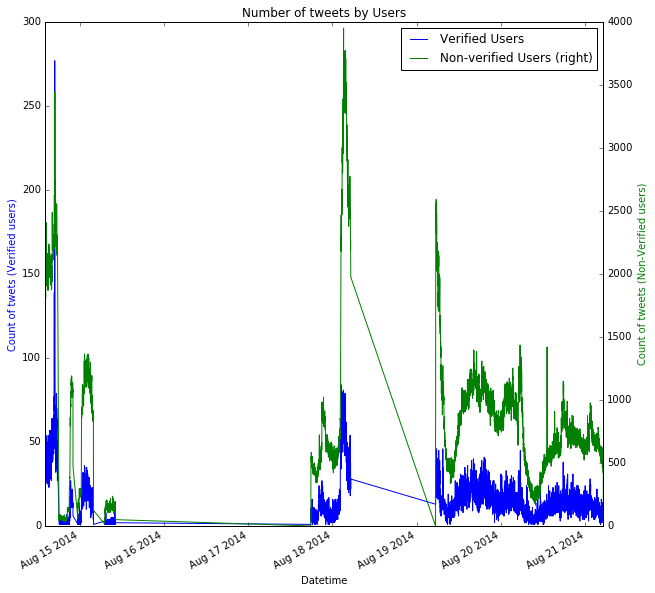

In [66]:
fig, ax = plt.subplots(figsize=(10,10))


groupedVerified.plot(kind='line', x='Datetime', y='created_at', label='Verified Users', ax=ax)
groupedNormal.plot(kind='line', x='Datetime', y='created_at', ax = ax, secondary_y=True, label='Non-verified Users')
plt.title('Number of tweets by Users')
# ax2 = ax.twinx()

ax.set_ylabel('Count of twets (Verified users)', color='b')
ax.right_ax.set_ylabel('Count of tweets (Non-Verified users)', color='g')